<a href="https://colab.research.google.com/github/satyambhatt5/Satyam/blob/main/Fashion%20Mnist%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
tf.__version__

'2.4.0'

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Fashion MNIST 

In [5]:
label_dict = {0	:"T-shirt/top",
1:	"Trouser",
2:	"Pullover",
3:	"Dress",
4:	"Coat",
5:	"Sandal",
6:	"Shirt",
7: "Sneaker",
8:	"Bag",
9:	"Ankle boot"}
print(label_dict)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

6 Shirt


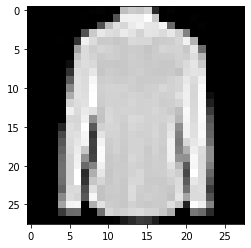

In [7]:
num=2400
plt.imshow(x_train[num], cmap="gray")
print(y_train[num], label_dict.get(y_train[num]))

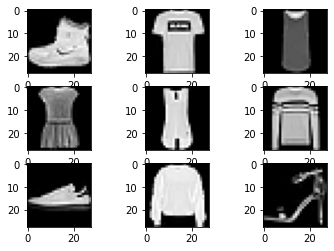

5 Sandal


In [8]:
from matplotlib import pyplot


# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'),vmin=0,vmax=255)
# show the figure
pyplot.show()
print(y_train[i], label_dict.get(y_train[i]))

In [9]:
x_train = x_train / 255 
# Normalization of images

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
#use one hot encoding 

y_train_ohe = tf.keras.utils.to_categorical(y_train)

In [12]:
print(y_train_ohe)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
#del model

In [14]:
# Building the Model 

model = tf.keras.models.Sequential()

# First Layer of model 
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# Second Layer (Dense)
model.add(tf.keras.layers.Dense(512, activation=tf.keras.activations.relu))


# Third & final layer(Dense)
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
#units=8
#Total params: 6,370,Trainable params: 6,370, Non-trainable params: 0

#units=16 ,Trainable params: 12,730,on-trainable params: 0

#units=32 Total params: 25,450,Trainable params: 25,450,Non-trainable params: 0

#units=64

#units=128



In [17]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.categorical_crossentropy, metrics=["acc"])

In [18]:
# loss (Cross Entropy) 
# 1. Binary   for the singal value 
# 2. Categorical        - Labels are in numerical format & In OHE formt too
# 3. Sparse Categorical - Labels can be in String format

In [19]:

model_history = model.fit(x_train, y_train_ohe, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 6s 2ms/step - loss: 0.9755 - acc: 0.7039 - val_loss: 0.5603 - val_acc: 0.8022
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5314 - acc: 0.8224 - val_loss: 0.4803 - val_acc: 0.8318
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4759 - acc: 0.8384 - val_loss: 0.4522 - val_acc: 0.8375
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4364 - acc: 0.8490 - val_loss: 0.4687 - val_acc: 0.8372
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4164 - acc: 0.8591 - val_loss: 0.4140 - val_acc: 0.8552
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4039 - acc: 0.8593 - val_loss: 0.4276 - val_acc: 0.8508
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3960 - acc: 0.8621 - val_loss: 0.3971 - val_acc: 0.8602
Epoch 8/10
1688/1688 [==============================] - 4s 2ms

In [20]:
#Epoch 10/10 DENSE KAYER 
#UNITS=512
#1688/1688 [==============================] - 6s 4ms/step - loss: 0.3653 - acc: 0.8745 - val_loss: 0.3764 - val_acc: 0.8670

#Units=8
#Epoch 10/10
#1688/1688 [==============================] - 2s 1ms/step - loss: 2.2995 - acc: 0.1633 - val_loss: 2.2996 - val_acc: 0.2038
#after using the validation frequency the accuracy increase 
#Epoch 10/10
#1688/1688 [==============================] - 2s 1ms/step - loss: 2.2537 - acc: 0.2732 - val_loss: 2.2510 - val_acc: 0.2885

#unit =16
#Epoch 10/10
#1688/1688 [==============================] - 2s 1ms/step - loss: 2.2997 - acc: 0.1768 - val_loss: 2.2994 - val_acc: 0.2380

#unit 32 
#Epoch 10/10
#1688/1688 [==============================] - 2s 1ms/step - loss: 2.2898 - acc: 0.2575 - val_loss: 2.2885 - val_acc: 0.2602

unit :64 



In [21]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

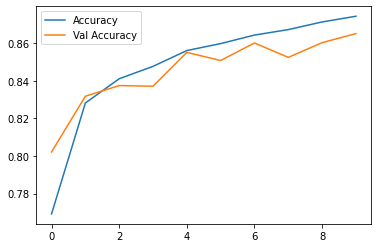

In [22]:
plt.plot(model_history.history.get("acc"), label="Accuracy")
plt.plot(model_history.history.get("val_acc"), label="Val Accuracy")
plt.legend()
plt.show()

[Accuracy graph for Mnist fasthion data][link text](https://docs.google.com/document/d/1htpxhPjLCbYfrQAzWC9LGzj4hChS-oenAjZqds013T4/edit)

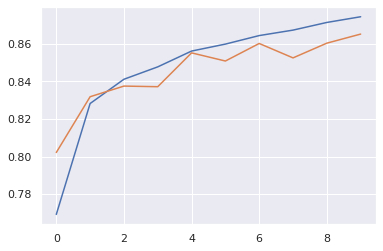

In [46]:
sns.lineplot(data=model_history.history.get("acc"))
sns.lineplot(data=model_history.history.get("val_acc"))
sns.set_theme()


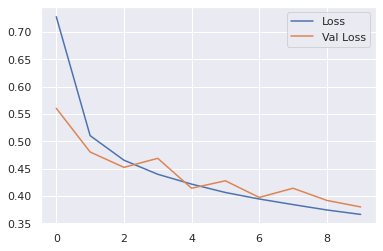

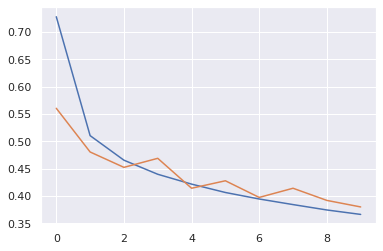

In [49]:
plt.plot(model_history.history.get("loss"), label="Loss")
plt.plot(model_history.history.get("val_loss"), label="Val Loss")
plt.legend()
plt.show()

sns.lineplot(data=model_history.history.get("loss"))
sns.lineplot(data=model_history.history.get("val_loss"))
sns.set_theme()


In [24]:
# 100 calls - 1 is converted
# ML Model says - 100 not converted
# Accuracy 99%   (not converted)
# Call was converted 0/1 (0%) 

# Call converted      -  0/1
# Call not converted  - 99/99

# Confusion Matrix - https://en.wikipedia.org/wiki/Confusion_matrix
 

In [25]:
x_test = x_test / 255

In [26]:
y_pred = model.predict(x_test)

In [27]:
y_pred_non_Ohe = np.argmax(y_pred, axis=1)

In [28]:
a = [1,4,6,3,2,1]
np.argmax(a)

2

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [30]:
#?classification_report

In [31]:
print(classification_report(y_test, y_pred_non_Ohe, target_names=list(label_dict.values()) ))

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.86      0.82      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.71      0.81      0.75      1000
       Dress       0.83      0.89      0.86      1000
        Coat       0.74      0.81      0.77      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.77      0.49      0.60      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [32]:
x=confusion_matrix(y_test, y_pred_non_Ohe) 
x


#, labels =list(label_dict.values()))


array([[856,   0,  27,  47,   6,   1,  52,   0,  11,   0],
       [  4, 950,   5,  33,   4,   0,   3,   0,   1,   0],
       [ 18,   1, 805,  14, 120,   1,  36,   0,   5,   0],
       [ 26,   9,  18, 891,  35,   0,  16,   0,   5,   0],
       [  0,   0, 118,  31, 809,   1,  34,   0,   7,   0],
       [  0,   0,   0,   1,   0, 934,   0,  44,   2,  19],
       [178,   1, 144,  47, 114,   1, 493,   0,  22,   0],
       [  0,   0,   0,   0,   0,  32,   0, 935,   0,  33],
       [  3,   1,  16,   7,   5,   2,   7,   5, 954,   0],
       [  0,   0,   0,   0,   0,   9,   0,  41,   1, 949]])

In [33]:
import pandas as pd
cm = pd.DataFrame(data = x.T, columns=label_dict.values(), index=list(label_dict.values()))
cm

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,856,4,18,26,0,0,178,0,3,0
Trouser,0,950,1,9,0,0,1,0,1,0
Pullover,27,5,805,18,118,0,144,0,16,0
Dress,47,33,14,891,31,1,47,0,7,0
Coat,6,4,120,35,809,0,114,0,5,0
Sandal,1,0,1,0,1,934,1,32,2,9
Shirt,52,3,36,16,34,0,493,0,7,0
Sneaker,0,0,0,0,0,44,0,935,5,41
Bag,11,1,5,5,7,2,22,0,954,1
Ankle boot,0,0,0,0,0,19,0,33,0,949


In [34]:
import seaborn as sns

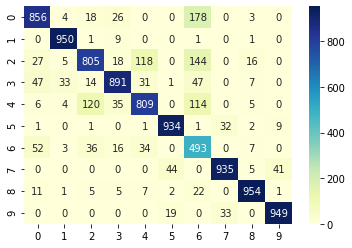

In [35]:
sns.heatmap(data=x.T,annot=True, fmt="d",cmap="YlGnBu")
sns.set_theme()

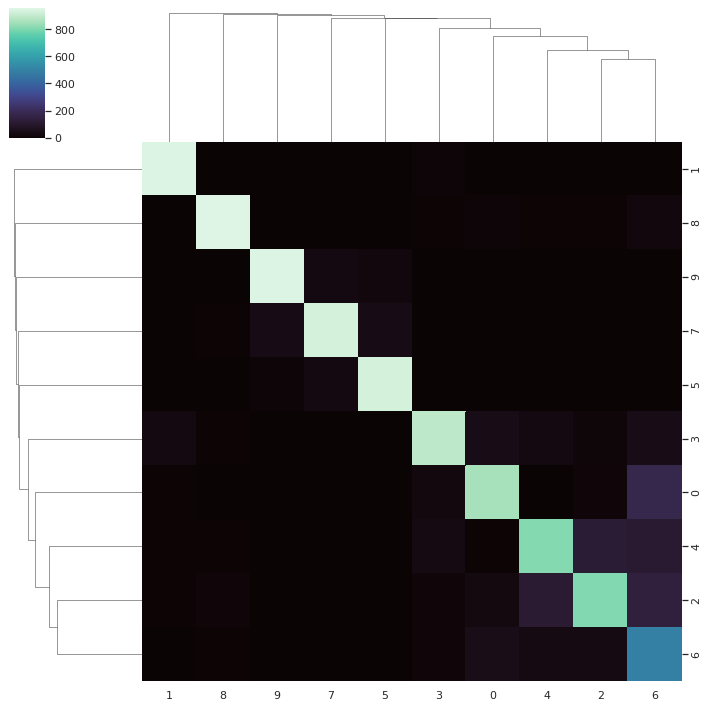

In [36]:
sns.clustermap(x.T,cmap="mako",fmt="d")
sns.set_theme()

In [37]:
# import pandas as pd
# cm = pd.DataFrame(data = confusion_matrix(y_test, y_pred_non_Ohe), columns=label_dict.values(), 
# index=[i + "_A" for i in list(label_dict.values())])
# cm

In [38]:
np.where((y_test == 6) & (y_pred_non_Ohe == 8))[0]

array([ 628, 1642, 1645, 2367, 2732, 2869, 2910, 3663, 3741, 3881, 4642,
       5065, 5123, 5345, 5510, 6596, 8069, 8150, 8211, 8567, 9183, 9227])

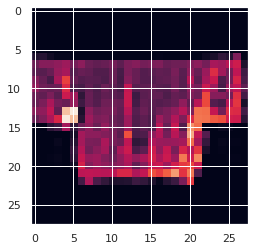

In [39]:
plt.imshow(x_test[6596])

In [40]:
import seaborn as sns


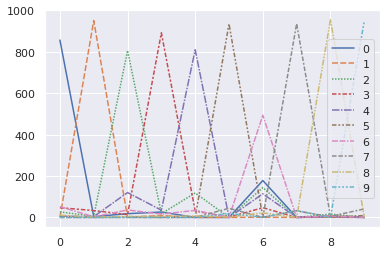

In [41]:
sns.lineplot(data=confusion_matrix(y_test, y_pred_non_Ohe))
